# Lending Club Loan Data

This Project is Dataquest's Monthly Challenge for the month of October, 2016.
Data is from year 2007-2019.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In this challenge, we are to explore using past loan data from Lending Club to build models that can predict if a loan will be paid off on time or not.

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
colors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
colors

['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

## ImportIng DataSet

In [2]:
data=pd.DataFrame()
for i in os.listdir():
    if ".csv" in i:
        data=pd.read_csv(i)
    elif ".xlsx" in i:
        details=pd.read_excel(i)

## Summary On Dataset

1. data - Loan_Club_Data
2. details - Info on each Column from Loan_Club_Data

### 1. data - Loan_Club_Data

In [3]:
data.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(2260668, 145)

In [5]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          0 non-null        float64
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  int64  
 3    funded_amnt                                 2260668 non-null  int64  
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

### 2. details - Info on each Column from Loan_Club_Data

In [6]:
details.head(1)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...


In [7]:
details.shape

(153, 2)

In [8]:
details.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  151 non-null    object
 1   Description  152 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


1. Details dataset seems to have more no. of column details compared to data dataset
2. Dropping those rows from details which are not present as columns or feature in main data dataset.

In [9]:
c=[]
for i in details['LoanStatNew']:
    if i not in data.columns:
        c.append(i)

In [10]:
details=details.drop(index=details[details['LoanStatNew'].isin(c)].index)

In [11]:
details.reset_index(drop=True,inplace=True)

In [12]:
details.shape

(133, 2)

1. 20 rows have been dropped as they weren't in data dataframe

## Collection of Information from Main dataset and combining with details

### So Detail dataset should contain:
1. Feature name
2. Datatype
3. Value
4. Description

In [13]:
dtypes = pd.DataFrame(data.dtypes,columns=['dtypes'])
dtypes['values']=data.iloc[0]
dtypes=dtypes.reset_index()

In [14]:
details.rename(columns={'LoanStatNew':'Feature names'},inplace=True)
details=dtypes.merge(details,left_on='index',right_on='Feature names').drop('index',axis=1)

In [15]:
details.head()

,dtypes,values,Feature names,Description
0,float64,NaN,id,A unique LC assigned ID for the loan listing.
1,float64,NaN,member_id,A unique LC assigned Id for the borrower member.
2,int64,2500,loan_amnt,The listed amount of the loan applied for by t...
3,int64,2500,funded_amnt,The total amount committed to that loan at tha...
4,float64,2500.0,funded_amnt_inv,The total amount committed by investors for th...


1. Now that we have megred two informations together we need to view them
2. As there are 133 columns we can split them into 5-6 groups for understanding all features

In [16]:
pd.set_option('max_colwidth', 5000) #to adjust max row width
details[:25]

,dtypes,values,Feature names,Description
0,float64,NaN,id,A unique LC assigned ID for the loan listing.
1,float64,NaN,member_id,A unique LC assigned Id for the borrower member.
2,int64,2500,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,int64,2500,funded_amnt,The total amount committed to that loan at that point in time.
4,float64,2500.0,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
5,object,36 months,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,float64,13.56,int_rate,Interest Rate on the loan
7,float64,84.92,installment,The monthly payment owed by the borrower if the loan originates.
8,object,C,grade,LC assigned loan grade
9,object,C1,sub_grade,LC assigned loan subgrade


In [17]:
details[25:50]

,dtypes,values,Feature names,Description
25,float64,0.0,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
26,object,Apr-2001,earliest_cr_line,The month the borrower's earliest reported credit line was opened
27,float64,1.0,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,float64,NaN,mths_since_last_delinq,The number of months since the borrower's last delinquency.
29,float64,45.0,mths_since_last_record,The number of months since the last public record.
30,float64,9.0,open_acc,The number of open credit lines in the borrower's credit file.
31,float64,1.0,pub_rec,Number of derogatory public records
32,int64,4341,revol_bal,Total credit revolving balance
33,float64,10.3,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
34,float64,34.0,total_acc,The total number of credit lines currently in the borrower's credit file


In [18]:
details[50:75]

,dtypes,values,Feature names,Description
50,float64,NaN,mths_since_last_major_derog,Months since most recent 90-day or worse rating
51,int64,1,policy_code,publicly available policy_code=1\nnew products not publicly available policy_code=2
52,object,Individual,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
53,float64,NaN,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
54,float64,NaN,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"
55,float64,0.0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
56,float64,0.0,tot_coll_amt,Total collection amounts ever owed
57,float64,16901.0,tot_cur_bal,Total current balance of all accounts
58,float64,2.0,open_acc_6m,Number of open trades in last 6 months
59,float64,2.0,open_act_il,Number of currently active installment trades


In [19]:
details[75:100]

,dtypes,values,Feature names,Description
75,float64,5.9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
76,float64,0.0,chargeoff_within_12_mths,Number of charge-offs within 12 months
77,float64,0.0,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
78,float64,140.0,mo_sin_old_il_acct,Months since oldest bank installment account opened
79,float64,212.0,mo_sin_old_rev_tl_op,Months since oldest revolving account opened
80,float64,1.0,mo_sin_rcnt_rev_tl_op,Months since most recent revolving account opened
81,float64,1.0,mo_sin_rcnt_tl,Months since most recent account opened
82,float64,0.0,mort_acc,Number of mortgage accounts.
83,float64,1.0,mths_since_recent_bc,Months since most recent bankcard account opened.
84,float64,NaN,mths_since_recent_bc_dlq,Months since most recent bankcard delinquency


In [20]:
details[100:125]

,dtypes,values,Feature names,Description
100,float64,3.0,num_tl_op_past_12m,Number of accounts opened in past 12 months
101,float64,100.0,pct_tl_nvr_dlq,Percent of trades never delinquent
102,float64,0.0,percent_bc_gt_75,Percentage of all bankcard accounts > 75% of limit.
103,float64,1.0,pub_rec_bankruptcies,Number of public record bankruptcies
104,float64,0.0,tax_liens,Number of tax liens
105,float64,60124.0,tot_hi_cred_lim,Total high credit/credit limit
106,float64,16901.0,total_bal_ex_mort,Total credit balance excluding mortgage
107,float64,36500.0,total_bc_limit,Total bankcard high credit/credit limit
108,float64,18124.0,total_il_high_credit_limit,Total installment high credit/credit limit
109,float64,NaN,sec_app_open_act_il,Number of currently active installment trades at time of application for the secondary applicant


In [21]:
details[100:125]

,dtypes,values,Feature names,Description
100,float64,3.0,num_tl_op_past_12m,Number of accounts opened in past 12 months
101,float64,100.0,pct_tl_nvr_dlq,Percent of trades never delinquent
102,float64,0.0,percent_bc_gt_75,Percentage of all bankcard accounts > 75% of limit.
103,float64,1.0,pub_rec_bankruptcies,Number of public record bankruptcies
104,float64,0.0,tax_liens,Number of tax liens
105,float64,60124.0,tot_hi_cred_lim,Total high credit/credit limit
106,float64,16901.0,total_bal_ex_mort,Total credit balance excluding mortgage
107,float64,36500.0,total_bc_limit,Total bankcard high credit/credit limit
108,float64,18124.0,total_il_high_credit_limit,Total installment high credit/credit limit
109,float64,NaN,sec_app_open_act_il,Number of currently active installment trades at time of application for the secondary applicant


### Selecting the target Column

Studing the above data we can conclude :

There are a few variables that are good targets for Loan predictive modelling:

1. Application outcome (accepted or rejected)
2. Interest rate (int_rate)
3. Grade of the loan (grade)
4. The loan status, if paid or defaulted (loan_status)

Picking Loan Status because it can give a overall Idea on how the borrower's nature is:
1. If he has defaulted or delayed then it tells us that loan should'nt be given out to such people.
2. If he pays it back, it means he is trust worthy and indirectly it increases his credit score, Capable of getting a loan.

## Visualization

### Loan Payment Term

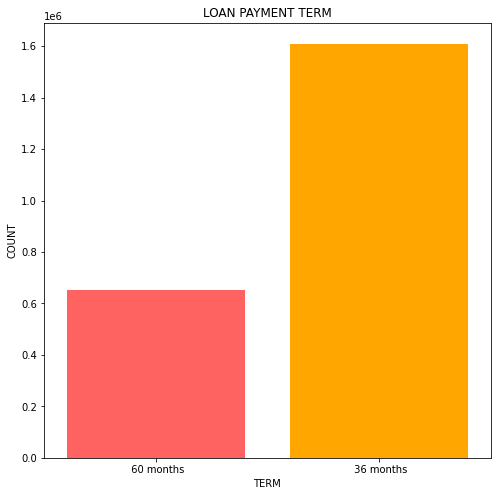

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(x=data["term"],palette=colors[3:],order= data['term'].value_counts().index[::-1],saturation=1)
plt.title('LOAN PAYMENT TERM')
plt.ylabel('COUNT')
plt.xlabel('TERM')
plt.show()

1. Most People prefer Short Loan Payment Duration

### Job Duration of Borrower

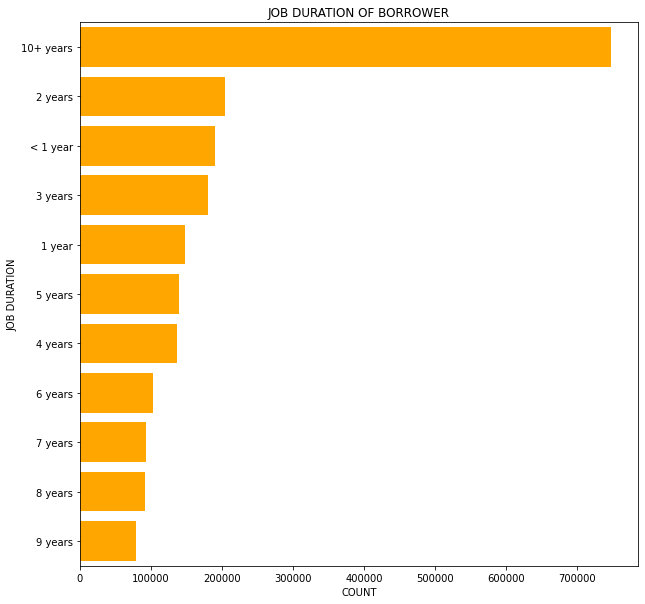

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['emp_length'],color=colors[4],order=data['emp_length'].value_counts().index[::],saturation=1)
plt.title('JOB DURATION OF BORROWER')
plt.xlabel('COUNT')
plt.ylabel('JOB DURATION')
plt.show()

1. People who Have been working for a decade are more likely to get a loan

### Loan Status vs Home Owners

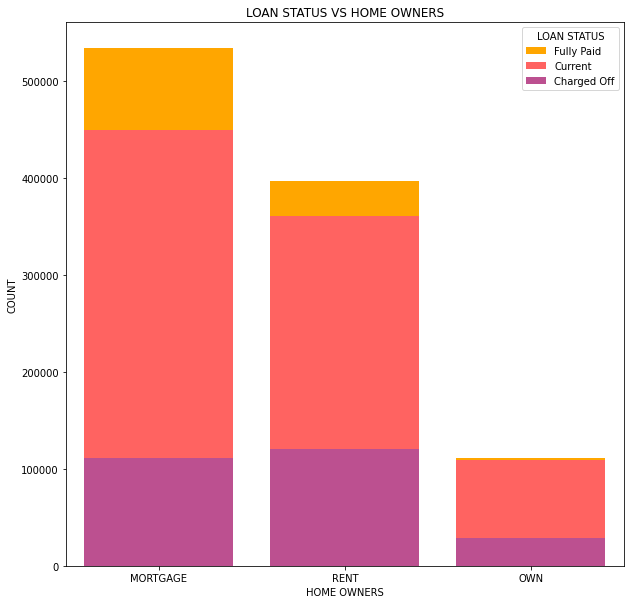

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['home_ownership'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[:1:],palette=colors[::-1],order=data['home_ownership'].value_counts().index[:3:],saturation=1)
sns.countplot(x=data['home_ownership'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[1:2:],palette=colors[3:],order=data['home_ownership'].value_counts().index[:3:],saturation=1)
sns.countplot(x=data['home_ownership'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[2:3:],palette=colors[2:],order=data['home_ownership'].value_counts().index[:3:],saturation=1)
plt.title('LOAN STATUS VS HOME OWNERS')
plt.ylabel('COUNT')
plt.xlabel('HOME OWNERS')
plt.legend(title='LOAN STATUS')
plt.show()

1. People who Own a home are less likely to apply for a loan, Means most people seem to apply a loan for buying a house

### Application Type

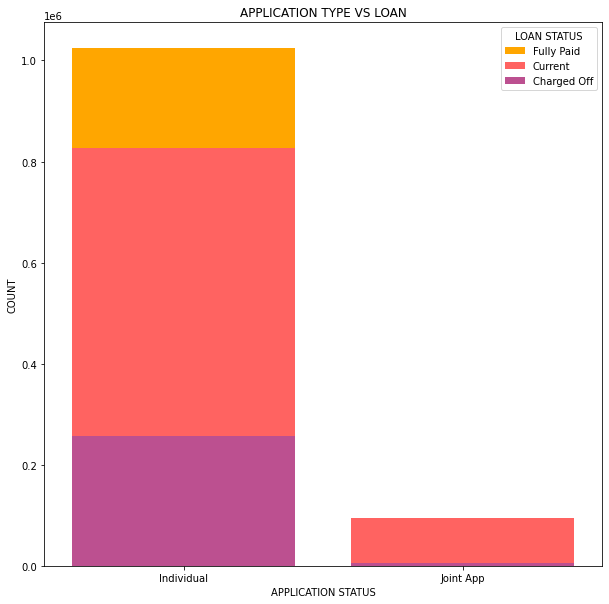

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['application_type'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[:1:],palette=colors[::-1],order=data['application_type'].value_counts().index[:3:],saturation=1)
sns.countplot(x=data['application_type'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[1:2:],palette=colors[3:],order=data['application_type'].value_counts().index[:3:],saturation=1)
sns.countplot(x=data['application_type'],hue=data['loan_status'],hue_order=data['loan_status'].value_counts().index[2:3:],palette=colors[2:],order=data['application_type'].value_counts().index[:3:],saturation=1)
plt.title('LOAN STATUS VS HOME OWNERS')
plt.title('APPLICATION TYPE VS LOAN')
plt.ylabel('COUNT')
plt.xlabel('APPLICATION STATUS')
plt.legend(title='LOAN STATUS')
plt.show()

1. Loans are mostly applied as a individual being

### Disbursement

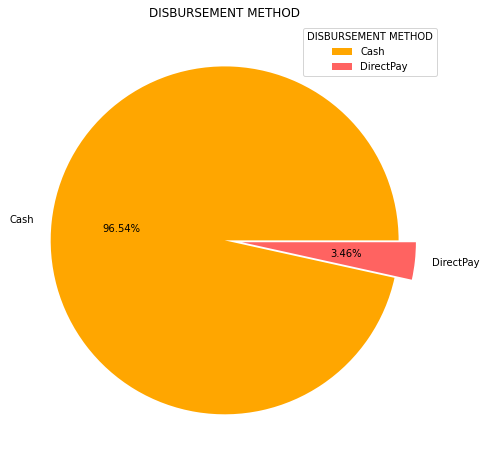

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data['disbursement_method'].value_counts(),autopct='%.2f%%',labels=data['disbursement_method'].value_counts().index,colors=colors[::-1],explode=[0, 0.1])
plt.title('DISBURSEMENT METHOD')
plt.legend(title='DISBURSEMENT METHOD')
plt.show()

1. People like paying loan using cash

### Employee Title vs Loan

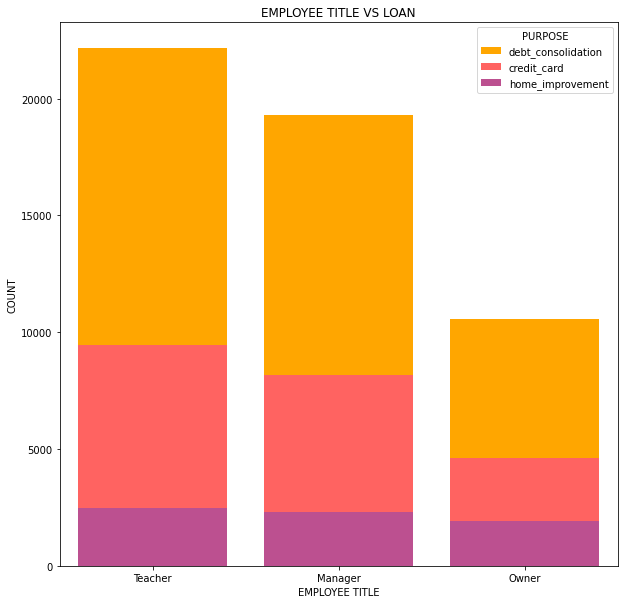

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['emp_title'],hue=data['purpose'],hue_order=data['purpose'].value_counts().index[:1:],order=data['emp_title'].value_counts().index[:3:],palette=colors[::-1],saturation=1)
sns.countplot(x=data['emp_title'],hue=data['purpose'],hue_order=data['purpose'].value_counts().index[1:2:],order=data['emp_title'].value_counts().index[:3:],palette=colors[3::],saturation=1)
sns.countplot(x=data['emp_title'],hue=data['purpose'],hue_order=data['purpose'].value_counts().index[2:3:],order=data['emp_title'].value_counts().index[:3:],palette=colors[2::],saturation=1)
plt.title('EMPLOYEE TITLE VS LOAN')
plt.ylabel('COUNT')
plt.xlabel('EMPLOYEE TITLE')
plt.legend(title='PURPOSE')
plt.show()

1. Seems like most of Teachers income is not enough and requires a loan
2. Once taken a loan, people start to apply for more loans.

### Employee Title vs Loan Grade

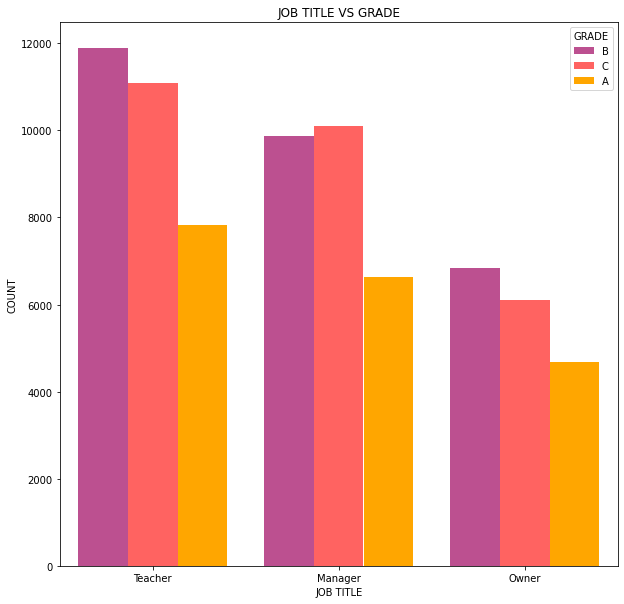

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['emp_title'],hue=data['grade'],hue_order=data['grade'].value_counts().index[:3:],order=data['emp_title'].value_counts().index[:3:],palette=colors[2::],saturation=1)
plt.title('JOB TITLE VS GRADE')
plt.ylabel('COUNT')
plt.xlabel('JOB TITLE')
plt.legend(title='GRADE')
plt.show()

1. Mostly People Prefer Grade A, B, and C loans

## Cleaning Dataset

Important Factors to consider while Giving out Loan
1. Credit Score
2. Current Income
3. Employment History
4. Occupation
5. Repayment History
6. Amount of Loan
7. Purpose of the Loan
8. Surplus Income
9. Collateral

ref-https://www.gopaysense.com/blog/important-factors-personal-loan-applications/

### Encode Target Column and Clean data

In [29]:
data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

For our model to work we need few sub category from above:
1. Fully Paid (important to understand if the person will repay or not)
2. Does not meet the credit policy. Status:Fully Paid (important to understand if the person will repay or not)

rest are to be considered as defaulters as they are unable to pay in time

In [30]:
mapping_dict = {'loan_status':{'Fully Paid':'Fully Paid','Does not meet the credit policy. Status:Fully Paid' : 'Fully Paid','Does not meet the credit policy. Status:Charged Off' : 'Default','Charged Off': 'Default','Late (31-120 days)': 'Default','Default': 'Default','Late (16-30 days)':'Default'}}
data = data.replace(mapping_dict)

In [31]:
data['loan_status'].value_counts()

Fully Paid         1043940
Current             919695
Default             288081
In Grace Period       8952
Name: loan_status, dtype: int64

As our model will be predicting the Payment and Default
1. Current doesnt give the clear insight whether the person will pay or not
2. Hence we extract only that that data which is usefull to us

In [32]:
data=data[(data['loan_status']=='Fully Paid') | (data['loan_status']=='Default')].reset_index(drop=True)

In [33]:
data['loan_status'].value_counts()

Fully Paid    1043940
Default        288081
Name: loan_status, dtype: int64

Now that we have extracted the required data:
1. Drop the columns with Null Values over 45%
2. Drop Unrelated Columns

In [34]:
print(data.isnull().sum().to_string())

id                                            1332021
member_id                                     1332021
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                       85267
emp_length                                      77856
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

Creating a temporary dataset which stores feature name and its null values count

In [35]:
temp=pd.DataFrame({'Name':data.isnull().sum().index,'Null Count':data.isnull().sum().values})

In [36]:
temp.head()

,Name,Null Count
0,id,1332021
1,member_id,1332021
2,loan_amnt,0
3,funded_amnt,0
4,funded_amnt_inv,0


Dropping Columns which contains more than 45% of null Values

In [37]:
data.drop(temp['Name'][temp['Null Count']>(45/100)*data.shape[0]],axis=1,inplace=True)

In [38]:
print(data.isnull().sum().to_string())

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      85267
emp_length                     77856
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                          15819
zip_code                           1
addr_state                         0
dti                              348
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_bal                          0
r

Filling Null values which are present in columns which are between 3% and 45%, by mode because some of them contains outliers 

In [39]:
temp1=pd.DataFrame({'Name':data.isnull().sum().index,'Null Count':data.isnull().sum().values})

In [40]:
null=temp1['Name'][(temp1['Null Count']<(45/100)*data.shape[0]) & (temp1['Null Count']>(3/100)*data.shape[0])]

In [41]:
for i in null:
    data.loc[data[i].isnull(),i]=data[i].mode()[0]

Dropping Rows from features which has less than 3% of null values

In [42]:
data.dropna(inplace=True)

In [43]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 87, dtype: int64

In [44]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311215 entries, 0 to 1332020
Data columns (total 87 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1311215 non-null  int64  
 1   funded_amnt                 1311215 non-null  int64  
 2   funded_amnt_inv             1311215 non-null  float64
 3   term                        1311215 non-null  object 
 4   int_rate                    1311215 non-null  float64
 5   installment                 1311215 non-null  float64
 6   grade                       1311215 non-null  object 
 7   sub_grade                   1311215 non-null  object 
 8   emp_title                   1311215 non-null  object 
 9   emp_length                  1311215 non-null  object 
 10  home_ownership              1311215 non-null  object 
 11  annual_inc                  1311215 non-null  float64
 12  verification_status         1311215 non-null  object 
 1

In [45]:
print(data.iloc[0].to_string())

loan_amnt                                  30000
funded_amnt                                30000
funded_amnt_inv                          30000.0
term                                   36 months
int_rate                                   22.35
installment                              1151.16
grade                                          D
sub_grade                                     D5
emp_title                            Supervisor 
emp_length                               5 years
home_ownership                          MORTGAGE
annual_inc                              100000.0
verification_status              Source Verified
issue_d                                 Dec-2018
loan_status                           Fully Paid
pymnt_plan                                     n
purpose                       debt_consolidation
title                         Debt consolidation
zip_code                                   917xx
addr_state                                    CA
dti                 

In [46]:
print(data.dtypes.to_string())

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal   

Firstly dealing with Object DataType

In [47]:
obj=[]
for i in data.select_dtypes('object').columns:
    print('---------',i,'---------')
    print(data[i].value_counts())
    obj.append(i)

--------- term ---------
 36 months    990652
 60 months    320563
Name: term, dtype: int64
--------- grade ---------
B    380499
C    373550
A    225401
D    198159
E     92748
F     31746
G      9112
Name: grade, dtype: int64
--------- sub_grade ---------
C1    83180
B4    80677
B5    79887
B3    79400
C2    77423
C3    73451
C4    73088
B2    71658
B1    68877
C5    66408
A5    61965
A4    50400
D1    50396
D2    44022
A1    40931
D3    38900
A3    36506
A2    35599
D4    35114
D5    29727
E1    23381
E2    21127
E3    18230
E4    15580
E5    14430
F1     9859
F2     7082
F3     6053
F4     4825
F5     3927
G1     2967
G2     2124
G3     1601
G4     1274
G5     1146
Name: sub_grade, dtype: int64
--------- emp_title ---------
Teacher                    103122
Manager                     18888
Owner                        9927
Registered Nurse             8510
RN                           8324
                            ...  
Wait Staff Manager              1
GSM2                    

1. Dates related to Loans can be removed as they have been already considered in other features

In [48]:
data.drop(['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

What About Hardships ?
1. Hardship Flags shows us the count of customers applied for hardships.
2. 885 nos. of customers which is below 1% of the rest dataset so we can ignore them as this data is comparitively low.

In [49]:
data.drop(['hardship_flag','debt_settlement_flag'],axis=1,inplace=True)

1. Grade of loan doesnt matter while repaying the loan

In [50]:
data.drop(['grade','sub_grade'],axis=1,inplace=True)

In [51]:
obj=[]
for i in data.select_dtypes('object').columns:
    print('---------',i,'---------')
    print(data[i].value_counts())
    obj.append(i)

--------- term ---------
 36 months    990652
 60 months    320563
Name: term, dtype: int64
--------- emp_title ---------
Teacher                    103122
Manager                     18888
Owner                        9927
Registered Nurse             8510
RN                           8324
                            ...  
Wait Staff Manager              1
GSM2                            1
Transition Liaision             1
Licensed Vocation Nurse         1
Acft mechanic                   1
Name: emp_title, Length: 373028, dtype: int64
--------- emp_length ---------
10+ years    505597
2 years      118831
< 1 year     106057
3 years      105050
1 year        85892
5 years       82247
4 years       78705
6 years       61348
8 years       59323
7 years       58478
9 years       49687
Name: emp_length, dtype: int64
--------- home_ownership ---------
MORTGAGE    648597
RENT        521344
OWN         140769
ANY            280
OTHER          180
NONE            45
Name: home_ownership, dtype

### Pickling the columns for later use

In [52]:
export=['emp_title','emp_length','purpose','zip_code','addr_state']
for i in export:
    blank=[]
    blank.append(data[i].unique().tolist())
    #pickle.dump(blank,open(i+'.pkl','wb'))

Also dropping the following
1. Title is already mentioned in data set as purpose
2. Payment Plan and Policy code only has 1 value hence it can be drop

In [53]:
data.drop(['policy_code','pymnt_plan','title'],axis=1,inplace=True)

Dropping the features which will be derived after getting the loan

In [54]:
data.drop(['funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],axis=1,inplace=True)

## Encode the data 

In [55]:
one=[]
ordinal=[]
num=[]
for i in data.select_dtypes('object').columns:
    if i=='loan_status':
        continue
    elif len(data[i].value_counts())<=6:
        one.append(i)
    else:
        ordinal.append(i)
for i in data.select_dtypes(exclude='object').columns:
    num.append(i)
print('one hot encode : ', one)
print()
print('ordinal encode : ', ordinal)
print()
print('continuos : ', num)

one hot encode :  ['term', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type', 'disbursement_method']

ordinal encode :  ['emp_title', 'emp_length', 'purpose', 'zip_code', 'addr_state']

continuos :  ['loan_amnt', 'int_rate', 'installment']


Ordinal Encoding to those columns which contains more unique values than 6

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[ordinal]=oe.fit_transform(data[ordinal])

One Hot Encoding to those columns which contains less unique values than 6

In [57]:
temp=pd.get_dummies(data, columns = one)

In [58]:
data.drop(one,axis=1,inplace=True)

In [59]:
data[temp.columns]=temp

In [60]:
data.shape

(1311215, 26)

In [61]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'term_ 36 months',
       'term_ 60 months', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App',
       'disbursement_method_Cash', 'disbursement_method_DirectPay'],
      dtype='object')

## Seperating X and Y 

In [62]:
x=data.loc[:,data.columns!='loan_status']

In [63]:
y=data.loc[:,'loan_status']

## Data Balancing

1. There are many Methods for data balancing from which I have chose SMOTE.
2. Because SMOTE creates synthetic data points to balance the data, hence accuracy is not affected.

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=1)
x, y = sm.fit_resample(x, y)
#data = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

## Standarizing Data

Above Mentioned Columns have Outliers Removing them by Standardizing the data
1. Standard Scaler (Using This)
2. MinMax Scaler

By Standarizing the data Accuracy of the model drops quite significatly hence avoiding it

## Correlation with target column

To ckeck the Correlation between target column we cant use Corr function as target column is a classificaton problem.
So to check its correlation we have two methods :
1. One Way ANNOVA test (continous vs discrete)
2. Chi-Square test (discrete vs discrete)
3. Point Biserialr (continous vs discrete)

Lets Declare Hypothesis:
1. Null Hypothesis : there is NO correlation between independent and target column
2. Alternate Hypothesis : there is correlation between independent and target column

Conditions:
1. P-value <= 0.05 : we reject Null Hypothesis and accept Alternate Hypothesis
2. P-value > 0.05 : we accept Null Hypothesis and reject Alternate Hypothesis

Note: I will not be performing Chi-Square test as Discrete columns are already being filtered out using domain knowledge

In [65]:
data = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)

### CHI-Square Test

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [67]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(data[ordinal], data['loan_status'])
chisquare=pd.DataFrame({'Name':fit.feature_names_in_,'P-Values':fit.pvalues_})

In [68]:
chisquare

,Name,P-Values
0,emp_title,0.000000
1,emp_length,0.000783
2,purpose,0.000000
3,zip_code,0.000000
4,addr_state,0.058215


In [69]:
drop_col=chisquare['Name'][chisquare['P-Values']>0.05].tolist()

We can see that none of those columns have P-values greater than 0.05 so those columns are related to target column

### One Way ANNOVA Test

from scipy.stats import f_oneway

data.drop(drop_col,axis=1,inplace=True)

1. Tried with One Way Annova, while it does tell us the related columns but it doesnt tell us that how much related it is to target column
2. Hence choose Point Biserial because it also tell use the correlation 

### Point Biserialr

In [70]:
x.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'purpose', 'zip_code', 'addr_state', 'term_ 36 months',
       'term_ 60 months', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_f', 'initial_list_status_w',
       'application_type_Individual', 'application_type_Joint App',
       'disbursement_method_Cash', 'disbursement_method_DirectPay'],
      dtype='object')

## Building a Base Model

Various Types of Machine Learning Algorith are present:
1. Logistic Regression
2. Descision Tree
3. SVM Classifier
4. KNN

From which we choose Logistic Regression as our base model because target contains binary classification

### Shuffle the data

In [71]:
data = pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1)

In [72]:
from sklearn.utils import shuffle

In [73]:
data = shuffle(data).reset_index(drop=True)

In [74]:
data.head()

,loan_status,loan_amnt,int_rate,installment,emp_title,emp_length,purpose,zip_code,addr_state,term_ 36 months,...,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,disbursement_method_DirectPay
0,Fully Paid,22000,11.440000,724.850000,182642.000000,1.000000,2.000000,569.000000,14.0000,1,...,0,0,0,1,1,0,1,0,1,0
1,Default,7550,13.980000,257.970000,180491.000000,1.000000,2.000000,199.000000,20.0000,1,...,0,1,0,0,0,1,1,0,1,0
2,Default,10000,9.119299,318.693512,10291.942085,3.607018,6.187718,143.629842,38.4193,1,...,1,0,0,0,1,0,1,0,1,0
3,Default,35000,23.880000,1370.950000,93392.000000,10.000000,2.000000,135.000000,34.0000,1,...,0,0,0,1,0,1,0,1,1,0
4,Fully Paid,35000,7.260000,1084.870000,217657.000000,3.000000,2.000000,891.000000,4.0000,1,...,0,0,1,0,0,1,1,0,1,0


### Seperating x & y into training and testing data

In [75]:
x=data.loc[:,data.columns!='loan_status']

In [76]:
y=data.loc[:,'loan_status']

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=64)

### Building a model

Before building a Prediction model:
1. This is a classification model as we require to predict the Loan Status (Fully Paid, Default)
2. We have to predict that a person will pay the loan or not

We can check the accuracy of a model by confusion matrix
1. In this case we have to focus on correctly prediciting a person who will not pay back
2. this is shown by True Positive from Confusion Matrix
3. As we know TP is indirectly propottional to TN we can only increase one by chaging the threshold
3. Even if our model predicts True Positive a bit less accurate that person can get a loan from anywhere less but we cant afford loosing money of our peers


In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [81]:
ytest_pred=lr.predict(xtest)

In [82]:
ytrain_pred=lr.predict(xtrain)

### Checking the accuracy or predicting power of model

In [83]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay

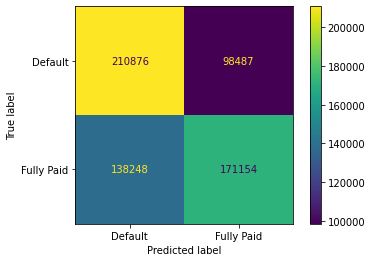

In [84]:
plot_confusion_matrix(lr, xtest, ytest, cmap='viridis')
plt.show()

In [85]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

     Default       0.60      0.68      0.64    309363
  Fully Paid       0.63      0.55      0.59    309402

    accuracy                           0.62    618765
   macro avg       0.62      0.62      0.62    618765
weighted avg       0.62      0.62      0.62    618765



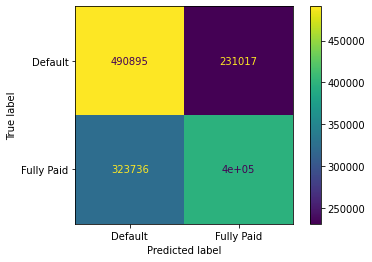

In [86]:
plot_confusion_matrix(lr, xtrain, ytrain, cmap='viridis')
plt.show()

In [87]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

     Default       0.60      0.68      0.64    721912
  Fully Paid       0.63      0.55      0.59    721873

    accuracy                           0.62   1443785
   macro avg       0.62      0.62      0.61   1443785
weighted avg       0.62      0.62      0.61   1443785



Accuracy of the model doesnt seem high we have to fix it by trying different algoritms

### Trying out Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier 

In [90]:
rf=RandomForestClassifier(n_estimators=50,verbose=3)

In [91]:
rf.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 o

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


RandomForestClassifier(n_estimators=50, verbose=3)

In [92]:
ytest_pred=rf.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.6s finished


In [93]:
confusion_matrix(ytest,ytest_pred)

array([[236787,  72576],
       [ 17611, 291791]], dtype=int64)

In [94]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

     Default       0.93      0.77      0.84    309363
  Fully Paid       0.80      0.94      0.87    309402

    accuracy                           0.85    618765
   macro avg       0.87      0.85      0.85    618765
weighted avg       0.87      0.85      0.85    618765



In [95]:
ytrain_pred=rf.predict(xtrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.9s finished


In [96]:
confusion_matrix(ytrain,ytrain_pred)

array([[721704,    208],
       [     5, 721868]], dtype=int64)

In [97]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

     Default       1.00      1.00      1.00    721912
  Fully Paid       1.00      1.00      1.00    721873

    accuracy                           1.00   1443785
   macro avg       1.00      1.00      1.00   1443785
weighted avg       1.00      1.00      1.00   1443785



### Seems like we have to increase the predicting power of the model

We can use boosting techniques for that :
1. AdaBoost (Adaptive Boosting)
2. Gradient Tree Boosting
3. XGBoost

### Adaboost

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [99]:
abc=AdaBoostClassifier(n_estimators=100,random_state=0)

In [100]:
abc.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [101]:
ytest_pred=abc.predict(xtest)

In [102]:
confusion_matrix(ytest,ytest_pred)

array([[230725,  78638],
       [ 15675, 293727]], dtype=int64)

In [103]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

     Default       0.94      0.75      0.83    309363
  Fully Paid       0.79      0.95      0.86    309402

    accuracy                           0.85    618765
   macro avg       0.86      0.85      0.85    618765
weighted avg       0.86      0.85      0.85    618765



In [104]:
ytrain_pred=abc.predict(xtrain)

In [105]:
confusion_matrix(ytrain,ytrain_pred)

array([[538782, 183130],
       [ 37007, 684866]], dtype=int64)

In [106]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

     Default       0.94      0.75      0.83    721912
  Fully Paid       0.79      0.95      0.86    721873

    accuracy                           0.85   1443785
   macro avg       0.86      0.85      0.85   1443785
weighted avg       0.86      0.85      0.85   1443785



### Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [109]:
clf.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [110]:
ytest_pred=clf.predict(xtest)

In [111]:
confusion_matrix(ytest,ytest_pred)

array([[226114,  83249],
       [ 11137, 298265]], dtype=int64)

In [112]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

     Default       0.95      0.73      0.83    309363
  Fully Paid       0.78      0.96      0.86    309402

    accuracy                           0.85    618765
   macro avg       0.87      0.85      0.85    618765
weighted avg       0.87      0.85      0.85    618765



In [113]:
ytrain_pred=clf.predict(xtrain)

In [114]:
confusion_matrix(ytrain,ytrain_pred)

array([[527947, 193965],
       [ 26163, 695710]], dtype=int64)

In [115]:
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

     Default       0.95      0.73      0.83    721912
  Fully Paid       0.78      0.96      0.86    721873

    accuracy                           0.85   1443785
   macro avg       0.87      0.85      0.85   1443785
weighted avg       0.87      0.85      0.85   1443785



### XG Boost

In [116]:
from xgboost import XGBClassifier

In [117]:
xg = XGBClassifier(tree_method='gpu_hist')

In [118]:
yt = np.where(ytrain=='Default',0,1)

In [119]:
yts=np.where(ytest=='Default',0,1)

In [120]:
xg.fit(xtrain, yt)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [121]:
ytest_pred=xg.predict(xtest)

In [122]:
confusion_matrix(yts,ytest_pred)

array([[232121,  77242],
       [  6645, 302757]], dtype=int64)

In [123]:
print(classification_report(yts,ytest_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85    309363
           1       0.80      0.98      0.88    309402

    accuracy                           0.86    618765
   macro avg       0.88      0.86      0.86    618765
weighted avg       0.88      0.86      0.86    618765



In [124]:
ytrain_pred=xg.predict(xtrain)

In [125]:
confusion_matrix(yt,ytrain_pred)

array([[543279, 178633],
       [ 14837, 707036]], dtype=int64)

In [126]:
print(classification_report(yt,ytrain_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85    721912
           1       0.80      0.98      0.88    721873

    accuracy                           0.87   1443785
   macro avg       0.89      0.87      0.86   1443785
weighted avg       0.89      0.87      0.86   1443785



Comparing all the Boosting algoritm XG Boost works better and gives higher Accuracy of them all

## Hyperparameter tuning xgboost

### Bayesian Optimization with HYPEROPT 

Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

In this process, we train the model with various possible range of parameters until a best fit model is obtained.

Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.


### What is HYPEROPT 

HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

More information on Hyperopt can be found at the following link:-

https://hyperopt.github.io/hyperopt/?source=post_page

### Implementation

After checking the hyperparameter tuner accuracy increases by only 0.1 percent at the cost of 2.3hrs

Hence keeping the default hyperparameters

## Tesing Manually

In [127]:
x.iloc[2088]

loan_amnt                               27549.000000
int_rate                                   18.182626
installment                               893.550358
emp_title                              361237.677171
emp_length                                  6.898812
purpose                                     1.379762
zip_code                                  851.065551
addr_state                                  8.063089
term_ 36 months                             0.000000
term_ 60 months                             0.000000
home_ownership_ANY                          0.000000
home_ownership_MORTGAGE                     0.000000
home_ownership_NONE                         0.000000
home_ownership_OTHER                        0.000000
home_ownership_OWN                          0.000000
home_ownership_RENT                         1.000000
verification_status_Not Verified            0.000000
verification_status_Source Verified         0.000000
verification_status_Verified                0.

In [128]:
y[2088]

'Default'

In [129]:
ytry=xg.predict(x.iloc[[2088]])

In [130]:
ytry

array([0])

### Adjusting the Threshold 

1. As Default is important to us and it is depicted by positive value or 0
2. We need to increase True Positive and Decrease False Negative
3. By adjusting the threshold we can achieve this

In [131]:
ythres=xg.predict_proba(xtest)

In [132]:
ythres=ythres[:,1]

In [133]:
it=[0.5,0.6,0.7,0.8,0.9]
tpr=[]
fpr=[]

In [134]:
for i in it:
    temp=np.where(ythres>i,'Fully Paid','Default')
    tn,fp,fn,tp=confusion_matrix(ytest,temp).ravel()
    tprs=tp/(tp+fn)
    fprs=fp/(tn+fp)
    tpr.append(tprs)
    fpr.append(fprs)

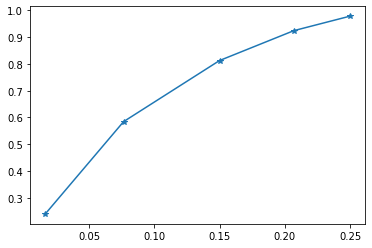

In [135]:
plt.plot(fpr,tpr,"-*")

Looking at this Reciever Opreating Charateristics:
1. after 0.7 curve seems to get stabalized
2. hence choosing 0.7 as a threshold

### Appling Threshold

In [136]:
yth=np.where(ythres>0.7,'Fully Paid','Default')

In [137]:
yth

array(['Fully Paid', 'Fully Paid', 'Default', ..., 'Default',
       'Fully Paid', 'Default'], dtype='<U10')

In [138]:
mat=confusion_matrix(ytest,yth)

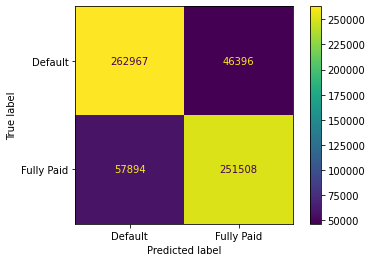

In [139]:
ConfusionMatrixDisplay(confusion_matrix=mat,display_labels=('Default','Fully Paid')).plot()
plt.show()

In [140]:
print(classification_report(ytest,yth))

              precision    recall  f1-score   support

     Default       0.82      0.85      0.83    309363
  Fully Paid       0.84      0.81      0.83    309402

    accuracy                           0.83    618765
   macro avg       0.83      0.83      0.83    618765
weighted avg       0.83      0.83      0.83    618765



As Default is important to us we can see the Recall rising after increasing the threshold to 0.7

## Pickling the Required Objects for Deploying the project

In [141]:
#pickle.dump(xg,open('logistic.pkl','wb'))

In [142]:
#pickle.dump(oe,open('ordinal.pkl','wb'))

<br>

## For deployement

In [143]:
col=list(x.columns)

In [144]:
#pickle.dump(col,open('columns.pkl','wb'))

In [145]:
col

['loan_amnt',
 'int_rate',
 'installment',
 'emp_title',
 'emp_length',
 'purpose',
 'zip_code',
 'addr_state',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'initial_list_status_f',
 'initial_list_status_w',
 'application_type_Individual',
 'application_type_Joint App',
 'disbursement_method_Cash',
 'disbursement_method_DirectPay']

In [146]:
o=["< 1 year","1 year","2 years","3 years","4 years","5 years","6 years","7 years","8 years","9 years","10+ years"]
#pickle.dump(o,open('emp_length.pkl','wb'))